In [22]:
#%reset
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler

hfont = {'fontname':'Helvetica'}

## read data 
CIP_data = pd.read_csv("CIP_data_encode_prev.csv")
CIP_data_no_drop = pd.read_csv("CIP_data_encode_prev_not_dropped.csv")
print(CIP_data_no_drop.columns)

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'CLINIC', 'YEAR', 'GENDERSP', 'Susceptible', 'MSM',
       'MSMW', 'MSW', 'Oth/Unk/Missing', 'REGION', 'Midwest', 'Northeast',
       'Southeast', 'Southwest', 'West', 'PREV_REGION', 'PREV_CLINIC',
       'DELTA_REGION', 'DELTA_CLINIC'],
      dtype='object')


In [3]:

#nn_data 
best_features_by_year_nn = {2005: ['PREV_REGION', 'West', 'Midwest', 'DELTA_REGION', 'DELTA_CLINIC', 'Southeast', 'Southwest', 'MSW'], 2006: ['PREV_CLINIC', 'PREV_REGION', 'DELTA_CLINIC', 'MSM', 'DELTA_REGION', 'Midwest'], 2007: ['PREV_CLINIC', 'PREV_REGION', 'MSW', 'DELTA_REGION', 'Midwest', 'MSMW', 'Oth/Unk/Missing'], 2008: ['PREV_REGION', 'PREV_CLINIC', 'DELTA_CLINIC', 'MSW', 'West', 'DELTA_REGION', 'MSM', 'Midwest', 'Northeast', 'MSMW'], 2009: ['PREV_CLINIC', 'DELTA_REGION', 'MSW', 'DELTA_CLINIC'], 2010: ['PREV_CLINIC', 'MSW', 'MSM', 'DELTA_CLINIC', 'MSMW', 'PREV_REGION', 'West', 'Southeast', 'Southwest', 'Oth/Unk/Missing']}
best_hyperparameters_by_year_nn = {2005: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 12, 'alpha': 0.12618568830660204, 'activation': 'tanh'}, 2006: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 12, 'alpha': 0.12618568830660204, 'activation': 'tanh'}, 2007: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 12, 'alpha': 0.12618568830660204, 'activation': 'tanh'}, 2008: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 12, 'alpha': 0.12618568830660204, 'activation': 'tanh'}, 2009: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 12, 'alpha': 0.12618568830660204, 'activation': 'tanh'}, 2010: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': 12, 'alpha': 0.12618568830660204, 'activation': 'tanh'}}
ROC_by_year_nn = {2005: 0.707710113960114, 2006: 0.7363098705025091, 2007: 0.6839585775693631, 2008: 0.6843168957154405, 2009: 0.6645239980510848, 2010: 0.6755020080321286}##lr_data 

#lr_data 
best_hyperparameters_by_year_lr = {2005: {'solver': 'liblinear', 'penalty': 'l1', 'C': 8.65}, 2006: {'solver': 'liblinear', 'penalty': 'l1', 'C': 35.730000000000004}, 2007: {'solver': 'liblinear', 'penalty': 'l1', 'C': 8.65}, 2008: {'solver': 'liblinear', 'penalty': 'l1', 'C': 54.85}, 2009: {'solver': 'liblinear', 'penalty': 'l2', 'C': 83.42}, 2010: {'solver': 'liblinear', 'penalty': 'l1', 'C': 8.65}}
best_features_by_year_lr = {2005: ['PREV_CLINIC', 'MSM', 'DELTA_CLINIC', 'PREV_REGION', 'MSW', 'Southwest', 'Northeast', 'Oth/Unk/Missing'], 2006: ['DELTA_REGION', 'PREV_CLINIC', 'DELTA_CLINIC', 'MSW', 'PREV_REGION', 'Oth/Unk/Missing', 'MSM', 'Southwest', 'Southeast'], 2007: ['MSM', 'PREV_CLINIC', 'MSW', 'Oth/Unk/Missing', 'MSMW'], 2008: ['PREV_CLINIC', 'DELTA_CLINIC', 'West', 'MSW', 'MSM', 'PREV_REGION', 'MSMW', 'Oth/Unk/Missing', 'Northeast'], 2009: ['PREV_CLINIC', 'Oth/Unk/Missing', 'DELTA_CLINIC', 'Northeast'], 2010: ['MSW', 'MSM', 'DELTA_CLINIC', 'PREV_CLINIC', 'Oth/Unk/Missing', 'West', 'Southwest', 'MSMW', 'DELTA_REGION', 'Southeast', 'Northeast']}
ROC_by_year_lr = {2005: 0.7317511805463615, 2006: 0.7423710317796873, 2007: 0.7048918256421187, 2008: 0.6971529715492738, 2009: 0.6166128405256475, 2010: 0.6792793175522966}
##rf_paper 
best_hyperparameters_by_year_rf = {2005: {'n_estimators': 163, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 81}, 2006: {'n_estimators': 163, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 81}, 2007: {'n_estimators': 163, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 81}, 2008: {'n_estimators': 163, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 81}, 2009: {'n_estimators': 163, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 81}, 2010: {'n_estimators': 163, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 81}}
best_features_by_year_rf = {2005: ['MSW', 'MSM', 'MSMW'], 2006: ['MSW', 'DELTA_CLINIC', 'MSM', 'MSMW', 'Oth/Unk/Missing'], 2007: ['MSW', 'PREV_CLINIC', 'MSM'], 2008: ['PREV_CLINIC', 'MSW', 'MSM', 'DELTA_CLINIC', 'Oth/Unk/Missing', 'Southeast'], 2009: ['MSW', 'MSM', 'PREV_CLINIC', 'DELTA_CLINIC', 'PREV_REGION', 'Midwest'], 2010: ['DELTA_CLINIC', 'PREV_CLINIC', 'MSW', 'PREV_REGION', 'West', 'DELTA_REGION', 'Midwest', 'Southeast', 'MSMW']}
ROC_by_year_rf = {2005: 0.7418091168091168, 2006: 0.6955865853135346, 2007: 0.6980265728800312, 2008: 0.7012934518997574, 2009: 0.6612742833389195, 2010: 0.6738955823293172}

In [7]:
########### Try functionalised 


def effective_unnecessary_threshold(threshold_seq, y_predict_proba, y_test, cipro_R_prevalence):

    get_effective_threshold = []
    incorrectly_get_X_threshold = [] #no bootstrapping, no 95% CI 
    sensitivity_threshold = []
    specificity_threshold = []
    for threshold in threshold_seq:

        y_predict_test = np.where(y_predict_proba[:, 1] > threshold, 1, 0)

        tn_test , fp_test , fn_test , tp_test  = confusion_matrix(y_true=y_test, y_pred=y_predict_test).ravel()

        sensitivity_test  = tp_test  / (tp_test   + fn_test )
        specificity_test   = tn_test / (tn_test + fp_test )

        sensitivity_threshold.append(sensitivity_test*100)
        specificity_threshold.append(specificity_test*100)
        get_effective_threshold.append(sensitivity_test * cipro_R_prevalence*100 + (100 -  cipro_R_prevalence*100)) #q_p
        incorrectly_get_X_threshold.append((100 - cipro_R_prevalence*100) * (1 - specificity_test)) #c_p"
    return(sensitivity_threshold, specificity_threshold, get_effective_threshold, incorrectly_get_X_threshold)

def get_best_hyperparameters(model, cv, space, X_train, y_train):
        search = RandomizedSearchCV(model, space, scoring='roc_auc', n_iter=1,  n_jobs=-1, cv=cv, random_state=1)
        result = search.fit(X_train, y_train)
        return(result.best_params_)

def get_best_features(feature_names, model_fit, X_test, y_test):
    PI = permutation_importance(model_fit, X_test, y_test, n_repeats = 10, random_state = 42)
    important_features = []
    for q in PI.importances_mean.argsort()[::-1]:
        if PI.importances_mean[q] - 2 * PI.importances_std[q] > 0:
          important_features.append(feature_names[q]) #works cos they are in same order as the x columns
    return(important_features)


def get_feature_effects(feature_names, model_fit, X_test, y_test):
    PI = permutation_importance(model_fit, X_test, y_test, n_repeats = 10, random_state = 42)
    
    return(PI.importances_mean)

oversample = RandomOverSampler(sampling_strategy = 0.5, random_state=42)

def get_test_train_data_overfit(CIP_data_no_drop, year, feature_names, oversample_size):
    years_train = np.array(range(year - 5, year))

    # first do for all clinics 
    train_data = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin(years_train)]
    X_train = train_data[feature_names] #need to consider all columns BEFORE feature engineering
    y_train = 1 - train_data['Susceptible']
    X_train, y_train = oversample.fit_resample(X_train,y_train)
    #test
    test_data = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin([year])]
    X_test = test_data[feature_names]
    y_test = 1 - test_data['Susceptible']
    cipro_R = y_test.sum()/len(y_test) 
    X_test, y_test = oversample.fit_resample(X_test,y_test)
    return(test_data, train_data, X_train, y_train, X_test, y_test, cipro_R)


def get_test_train_data(CIP_data_no_drop, year, feature_names):
    years_train = np.array(range(year - 5, year))

    CIP_data_training_years = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin(years_train)]
    CIP_data_testing_years = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin([year])]
    # first do for all clinics 
    train_data = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin(years_train)]
    X_train = train_data[feature_names] #need to consider all columns BEFORE feature engineering
    y_train = 1 - train_data['Susceptible']
    #test
    test_data = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin([year])]
    X_test = test_data[feature_names]
    y_test = 1 - test_data['Susceptible']
    return(test_data, train_data, X_train, y_train, X_test, y_test)

In [39]:
########### Now do proportion receiving effective and unnecessary treatment for years surrounding 2007 decision 
### now do a loop over different years to get the proportion receiving effective and unnecessary treatment 
### has LOOCV 

## NEEDED FOR FEATURE ENGINEERING 
feature_names = ['MSM','MSMW', 'MSW', 'Oth/Unk/Missing','Northeast', 'Southeast', 'Southwest', 'West', 'Midwest','PREV_REGION', 'PREV_CLINIC', 'DELTA_REGION', 'DELTA_CLINIC']


#### Loop set up 
test_years = [2005, 2006, 2007, 2008, 2009, 2010]

imporances_all_models = pd.DataFrame(0, index = feature_names, columns=np.arange(len(test_years)*3) + 1)

### effect features by year
best_effect_by_year_lr = {}
best_effect_by_year_nn = {}
best_effect_by_year_rf = {}
i = 1
for year in test_years: 
    years_train = np.array(range(year - 5, year))

    CIP_data_training_years = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin(years_train)]
    CIP_data_testing_years = CIP_data_no_drop.loc[CIP_data_no_drop['YEAR'].isin([year])]
    
    ## LOGISTIC REGRESSION - no overfit 
    test_data, train_data, X_train, y_train, X_test, y_test =  get_test_train_data(CIP_data_no_drop = CIP_data_no_drop, year = year, feature_names = feature_names)
    cipro_R_prev = y_test.sum()/len(y_test) #get prevalence for all clinics for "general" model for year 
    model_lr = LogisticRegression(class_weight = 'balanced', max_iter=4000, solver = best_hyperparameters_by_year_lr[year]['solver'], C = best_hyperparameters_by_year_lr[year]['C'], penalty = best_hyperparameters_by_year_lr[year]['penalty'])
    model_fit_lr = model_lr.fit(X_train, y_train)
    imporances_all_models[i + 6] = get_feature_effects(feature_names, model_fit_lr, X_test, y_test) #want it to be the "second" block
   
    ## NEURAL NETWORK 
    test_data, train_data, X_train, y_train, X_test, y_test, cipro_R_prev =  get_test_train_data_overfit(CIP_data_no_drop = CIP_data_no_drop, year = year, feature_names = feature_names, oversample_size = 0.5)
    model_nn = MLPClassifier(solver = 'lbfgs', activation = 'tanh', max_iter = 3000 ,hidden_layer_sizes= best_hyperparameters_by_year_nn[year]['hidden_layer_sizes'], alpha =  best_hyperparameters_by_year_nn[year]['alpha'], random_state=10, learning_rate = 'adaptive' )
    model_fit_nn = model_nn.fit(X_train, y_train)
    imporances_all_models[i] =  get_feature_effects(feature_names, model_fit_nn, X_test, y_test) #want it to be the "first" block
    
    ## RANDOM FOREST 

    model_rf = RandomForestClassifier(n_estimators = best_hyperparameters_by_year_rf[year]['n_estimators'], min_samples_split = best_hyperparameters_by_year_rf[year]['min_samples_split'], min_samples_leaf=best_hyperparameters_by_year_rf[year]['min_samples_leaf'], max_features = 'sqrt', max_depth = best_hyperparameters_by_year_rf[year]['max_depth'], random_state = 10)
    model_fit_rf = model_rf.fit(X_train, y_train)
    imporances_all_models[i + 12] = get_feature_effects(feature_names, model_fit_rf, X_test, y_test) #want it to be the "third" block
    i += 1


    

/Users/rem76/miniconda3/envs/GISP_init/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [40]:
print(imporances_all_models)

                       1         2         3         4         5         6   \
MSM              0.001994  0.048468 -0.011098  0.019361  0.002741  0.025609   
MSMW            -0.001223  0.000941  0.005497  0.008219  0.000262  0.014833   
MSW              0.008547 -0.017224  0.070275  0.026758  0.021957  0.034819   
Oth/Unk/Missing -0.005639 -0.000775  0.003634  0.001105  0.000564  0.001928   
Northeast       -0.018210 -0.010563  0.003673  0.012180  0.000446 -0.001365   
Southeast        0.038913 -0.022130 -0.012296  0.000795 -0.025879  0.005596   
Southwest        0.029416 -0.027012 -0.003986 -0.006359 -0.002938  0.004833   
West             0.104926 -0.016220 -0.014394  0.021975 -0.012684  0.006051   
Midwest          0.093792  0.008504  0.009405  0.014511 -0.012920  0.000656   
PREV_REGION      0.106292  0.103191  0.086544  0.104702 -0.023518  0.012436   
PREV_CLINIC      0.004452  0.116626  0.135001  0.090798  0.070160  0.086131   
DELTA_REGION     0.093708  0.039799  0.054097  0.019

0.13500065129607922


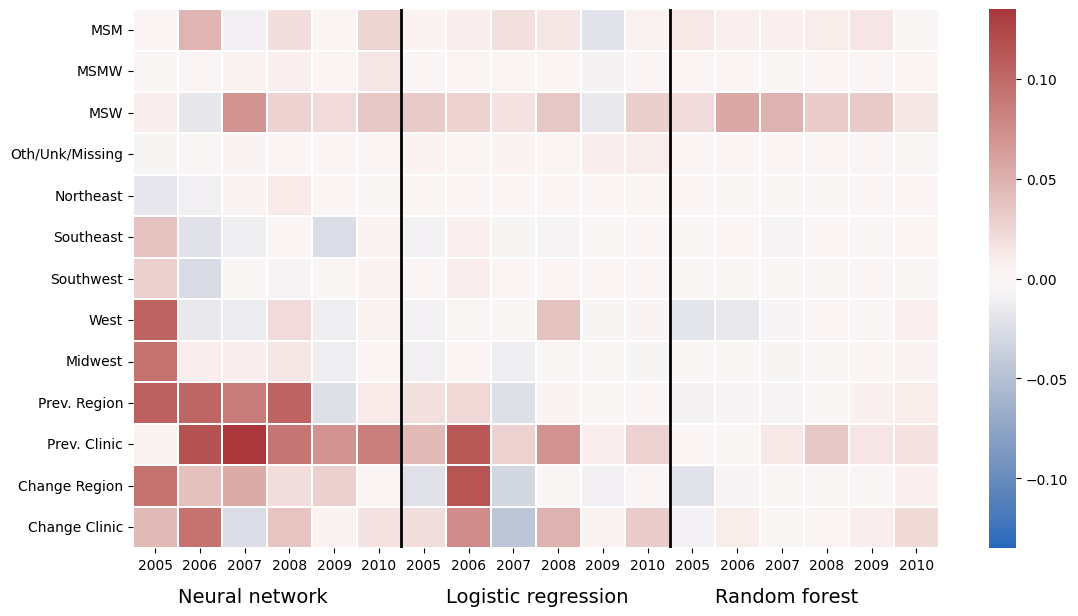

In [79]:
fig, ax = plt.subplots(figsize=(13,7))
x_axis_labels = [2005,2006,2007,2008,2009,2010]*3
y_axis_labels =['MSM','MSMW', 'MSW', 'Oth/Unk/Missing','Northeast', 'Southeast', 'Southwest', 'West', 'Midwest','Prev. Region', 'Prev. Clinic','Change Region', 'Change Clinic']


sns.heatmap(imporances_all_models,fmt="",cmap='vlag',linewidths=0.30,ax=ax, xticklabels = x_axis_labels, yticklabels = y_axis_labels, vmin =-abs(imporances_all_models.max()).max(), vmax = abs(imporances_all_models.max()).max())
ax.text((ax.get_xlim()[1])/18 * 1, (ax.get_ylim()[0]) + (ax.get_ylim()[0])*0.10, "Neural network", fontsize=14)
ax.text((ax.get_xlim()[1])/18 * 7, (ax.get_ylim()[0]) + (ax.get_ylim()[0])*0.10, "Logistic regression", fontsize=14)
ax.text((ax.get_xlim()[1])/18 * 13 , (ax.get_ylim()[0]) + (ax.get_ylim()[0])*0.10, "Random forest", fontsize=14)
ax.axvline((ax.get_xlim()[1])/18 * 6, color = "black", linewidth = 2)
ax.axvline((ax.get_xlim()[1])/18 * 12, color = "black", linewidth = 2)
#ax.collections[0].colorbar.set_label("Effect on auROC score")\

print(abs(imporances_all_models.max()).max())

#plt.savefig("Graphs/Magnitude_of_feature_importance_2005_2010_all_models.png", dpi = 600)

In [11]:
print(best_effect_by_year_rf)
print(best_effect_by_year_nn)
print(best_effect_by_year_lr)

best_effect_by_year_rf={2005: array([ 5.59116809e-03, -1.38888889e-03, -1.34140551e-03, -9.82905983e-03,
        2.17711301e-02,  7.12250712e-05, -3.52564103e-03,  1.02552232e-01]), 2006: array([ 0.02365578, -0.00087708,  0.02249905,  0.07006483, -0.00677514,
        0.        ]), 2007: array([ 0.0301029 , -0.00455907,  0.13523512, -0.00678651, -0.00358213,
        0.0024098 ,  0.00192784]), 2008: array([-9.43142010e-05,  6.29749394e-02,  5.99568849e-03,  2.81460523e-02,
        4.04203719e-04, -6.19779035e-04,  7.36998114e-03,  4.98517920e-04,
        9.97035839e-04, -1.10482350e-03]), 2009: array([ 0.03197796, -0.00208552,  0.02736097,  0.00893232]), 2010: array([ 0.01817938,  0.01899598, -0.00694779,  0.0214324 ,  0.0001071 ,
        0.00230254, -0.00161981, -0.00115127, -0.00149933,  0.00037483])}
best_effect_by_year_nn={2005: array([ 0.17540361,  0.02877493,  0.01003086,  0.02688746,  0.05232669,
       -0.00205366,  0.01862536,  0.09057455]), 2006: array([0.03256642, 0.11785941, 0.05896784, 0.06630228, 0.14319309,
       0.0168298 ]), 2007: array([ 0.02293865,  0.04827407,  0.15304155,  0.02141462, -0.00704702,
       -0.00076853,  0.00569233]), 2008: array([0.02918351, 0.1100512 , 0.05278901, 0.04353274, 0.07592293,
       0.00774724, 0.0404069 , 0.0402048 , 0.01783886, 0.0069523 ]), 2009: array([ 0.03283054, -0.0043809 ,  0.05473505,  0.0201469 ]), 2010: array([ 0.04423025,  0.05951807,  0.00095047,  0.02097724,  0.00637216,
       -0.0003079 ,  0.05447122,  0.02563588,  0.00507363,  0.00506024])}

best_effect_by_year_lr={2005: array([ 0.00506697,  0.        ,  0.03299984,  0.00456673,  0.00269485,
       -0.00932709,  0.        , -0.00921414, -0.010731  ,  0.0182669 ,
        0.04471518, -0.0211554 ,  0.01929966]), 2006: array([ 3.67115637e-02,  2.80880420e-03,  1.15801577e-02,  0.00000000e+00,
        4.23455979e-02,  0.00000000e+00,  6.35676741e-03, -3.12089356e-04,
       -1.64257556e-05,  2.36859396e-02,  1.11990802e-01,  1.14520368e-01,
        7.56570302e-02]), 2007: array([ 0.01557664,  0.00163089,  0.02268264,  0.00480945,  0.        ,
       -0.00552505,  0.        , -0.01808953, -0.01296389, -0.0236645 ,
        0.02822433, -0.0314029 , -0.04479947]), 2008: array([ 0.02054866,  0.0019046 ,  0.02295999,  0.00122313,  0.02378123,
       -0.002621  , -0.002953  ,  0.05869299, -0.00679713,  0.00503233,
        0.06978857, -0.0013105 ,  0.04868076]), 2009: array([-2.03058321e-02, -8.32147937e-03, -1.66251778e-02,  8.49928876e-03,
        2.84495021e-04, -1.08463727e-03,  3.55618777e-05, -5.84992888e-03,
       -3.25391181e-03, -3.84068279e-03,  9.15718350e-03, -9.60170697e-03,
        4.49857752e-03]), 2010: array([ 0.0183512 ,  0.00059764,  0.02564598,  0.00950958,  0.        ,
        0.00249604,  0.00606433,  0.01300756, -0.0026894 ,  0.00012304,
        0.02664792,  0.00202144,  0.03132361])}

{2005: array([ 5.59116809e-03, -1.38888889e-03, -1.34140551e-03, -9.82905983e-03,
        2.17711301e-02,  7.12250712e-05, -3.52564103e-03,  1.02552232e-01]), 2006: array([ 0.02365578, -0.00087708,  0.02249905,  0.07006483, -0.00677514,
        0.        ]), 2007: array([ 0.0301029 , -0.00455907,  0.13523512, -0.00678651, -0.00358213,
        0.0024098 ,  0.00192784]), 2008: array([-9.43142010e-05,  6.29749394e-02,  5.99568849e-03,  2.81460523e-02,
        4.04203719e-04, -6.19779035e-04,  7.36998114e-03,  4.98517920e-04,
        9.97035839e-04, -1.10482350e-03]), 2009: array([ 0.03197796, -0.00208552,  0.02736097,  0.00893232]), 2010: array([ 0.01817938,  0.01899598, -0.00694779,  0.0214324 ,  0.0001071 ,
        0.00230254, -0.00161981, -0.00115127, -0.00149933,  0.00037483])}
{2005: array([ 0.17540361,  0.02877493,  0.01003086,  0.02688746,  0.05232669,
       -0.00205366,  0.01862536,  0.09057455]), 2006: array([0.03256642, 0.11785941, 0.05896784, 0.06630228, 0.14319309,
       0.0